In [1]:
import numpy as  np
import pandas  as pd



In [2]:
df=pd.read_csv("motorcycleofsales.csv")
df

,Condition,Price,Location,Time,Model,Year,Category
0,REUSE,1590,PhnomPenh,13-Apr-23,Dream,2020,Allround
1,New,780,PhnomPenh,6 áž“áž¶áž‘áž¸áž˜áž»áž“,AJP GALP 50 Enduro,2005,Enduro / offroad
2,New,1250,PhnomPenh,29 áž“áž¶áž‘áž¸áž˜áž»áž“,AJP GALP 50 R,2005,Sport
3,REUSE,670,PhnomPenh,34 áž“áž¶áž‘áž¸áž˜áž»áž“,AJP GALP 50 Supermotard,2005,Super motard
4,REUSE,600,PhnomPenh,47 áž“áž¶áž‘áž¸áž˜áž»áž“,AJP PR3 125 Enduro,2015,Enduro / offroad
...,...,...,...,...,...,...,...
38746,New,1599,PhnomPenh,13 áž˜áŸ‰áŸ„áž„áž˜áž»áž“,GPX Demon GR200R,2021,Scooter
38747,REUSE,1900,PhnomPenh,14 áž˜áŸ‰áŸ„áž„áž˜áž»áž“,GPX Demon GR200R,2022,Scooter
38748,REUSE,1480,PhnomPenh,14 áž˜áŸ‰áŸ„áž„áž˜áž»áž“,GPX Demon GR200R,2019,Scooter
38749,REUSE,2300,PhnomPenh,14 áž˜áŸ‰áŸ„áž„áž˜áž»áž“,GPX Demon GR200R,2018,Scooter


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38751 entries, 0 to 38750
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Condition  38751 non-null  object
 1   Price      38751 non-null  int64 
 2   Location   38751 non-null  object
 3   Time       38751 non-null  object
 4   Model      38751 non-null  object
 5   Year       38751 non-null  int64 
 6   Category   38751 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [4]:
cat_features = [col for col in df.columns if df[col].dtypes == 'O']
cat_features

['Condition', 'Location', 'Time', 'Model', 'Category']

In [5]:
num_features = [col for col in df.columns if col not in cat_features]
num_features, len(num_features)

(['Price', 'Year'], 2)

In [6]:

df.isnull().mean()

Condition    0.0
Price        0.0
Location     0.0
Time         0.0
Model        0.0
Year         0.0
Category     0.0
dtype: float64

In [7]:
print('total passengers with values in all variables: ', df.dropna().shape[0])
print('total passengers in the  motorcycle: ', df.shape[0])
total_count = df.size

print('percentage of data without missing values: ', df.dropna().shape[0]/ np.float_(df.shape[0]))

total passengers with values in all variables:  38751
total passengers in the  motorcycle:  38751
percentage of data without missing values:  1.0


In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price', 'Year'], object: ['Condition', 'Location', 'Time', 'Model', 'Category']}

In [9]:


from sklearn.linear_model  import LinearRegression



In [10]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


df.dropna(subset=['Price', 'Year'], inplace=True)

In [11]:
df['Price_per_year'] = df['Price'] / df['Year']
df['Avg_price_by_category_location'] = df.groupby(['Category', 'Location'])['Price'].transform('mean')

In [13]:

selected_features = ['Location', 'Condition', 'Model', 'Category', 'Year', 
                     'Price_per_year', 'Avg_price_by_category_location']

In [14]:
X = df[selected_features]
y = df['Price']

In [16]:
from category_encoders import TargetEncoder

In [17]:
from sklearn.model_selection import train_test_split
encoder = TargetEncoder()
X = encoder.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2,]
}


In [16]:
from sklearn.model_selection import train_test_split
#X_train ,X_test ,y_train  ,y_test=train_test_split(X,y,test_size=0.9 ,random_state=17)

print("Number transactions  X_train datasetofchrun :" ,X_train.shape)
print("Number transaction Y_train  datasetofchrun:" ,y_train.shape)
print("Number transactions X_test datasetofchurn:" ,X_test.shape) 
print("Number transactions  Y_test  datasetofchrun:" ,y_test.shape)

Number transactions  X_train datasetofchrun : (31000, 7)
Number transaction Y_train  datasetofchrun: (31000,)
Number transactions X_test datasetofchurn: (7751, 7)
Number transactions  Y_test  datasetofchrun: (7751,)


In [19]:
from  sklearn.linear_model  import LogisticRegression
from  sklearn.svm  import SVC
from  sklearn.neighbors  import  KNeighborsClassifier
from  sklearn.naive_bayes import  GaussianNB
from  sklearn.tree  import DecisionTreeClassifier
from  sklearn.ensemble  import RandomForestClassifier


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score


#### Logistic Regression

In [21]:
results=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score']

In [20]:


classifier = LogisticRegression(random_state = 0)


classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred ,average='weighted' )
rec = recall_score(y_test, y_pred ,average='weighted')
f1 = f1_score(y_test, y_pred ,average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2.0,average='weighted')
results = pd.DataFrame([['LogisticRegression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression   0.14153   0.072552  0.14153  0.077486  0.098835


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:

classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred ,average='weighted' )
rec = recall_score(y_test, y_pred ,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted' )
f2 = fbeta_score(y_test, y_pred, beta=2.0 ,average='weighted')
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
results

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29376\4251823072.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
1,K-Nearest Neighbours,0.295059,0.308667,0.295059,0.282782,0.286633
0,Logistic Regression,0.141530,0.072552,0.141530,0.077486,0.098835


In [22]:
classifier = GaussianNB()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred ,average='weighted')
rec = recall_score(y_test, y_pred,average='weighted' )
f1 = f1_score(y_test, y_pred ,average='weighted' )
f2 = fbeta_score(y_test, y_pred, beta=2.0 ,average='weighted')
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
results

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29376\686232452.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
2,Naive Byes,0.514772,0.504411,0.514772,0.461412,0.479312
0,K-Nearest Neighbours,0.295059,0.308667,0.295059,0.282782,0.286633
1,Logistic Regression,0.141530,0.072552,0.141530,0.077486,0.098835


In [23]:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred ,average='weighted' )
rec = recall_score(y_test, y_pred ,average='weighted' )
f1 = f1_score(y_test, y_pred  ,average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2.0 ,average='weighted')
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
results

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29376\2478952851.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
3,Decision Tree,0.987356,0.988851,0.987356,0.987488,0.987273
0,Naive Byes,0.514772,0.504411,0.514772,0.461412,0.479312
1,K-Nearest Neighbours,0.295059,0.308667,0.295059,0.282782,0.286633
2,Logistic Regression,0.141530,0.072552,0.141530,0.077486,0.098835


In [24]:
classifier=RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred ,average='weighted' )
rec = recall_score(y_test, y_pred ,average='weighted' )
f1 = f1_score(y_test, y_pred  ,average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2.0 ,average='weighted')
model_results = pd.DataFrame([[
'Random forest', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
results

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29376\3680450961.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Decision Tree,0.987356,0.988851,0.987356,0.987488,0.987273
4,Random forest,0.962844,0.963599,0.962844,0.961732,0.962127
1,Naive Byes,0.514772,0.504411,0.514772,0.461412,0.479312
2,K-Nearest Neighbours,0.295059,0.308667,0.295059,0.282782,0.286633
3,Logistic Regression,0.141530,0.072552,0.141530,0.077486,0.098835


In [25]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred,average='weighted')
rec = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred ,average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2.0 ,average='weighted')
model_results = pd.DataFrame([['Support vector machine(Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
results

In [22]:
classifier = SVC( kernel='poly', C=1.0,random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred,average='weighted')
rec = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred ,average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2.0 ,average='weighted')
model_results = pd.DataFrame([['Support vector machine(Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
results

<Axes: ylabel='Model'>

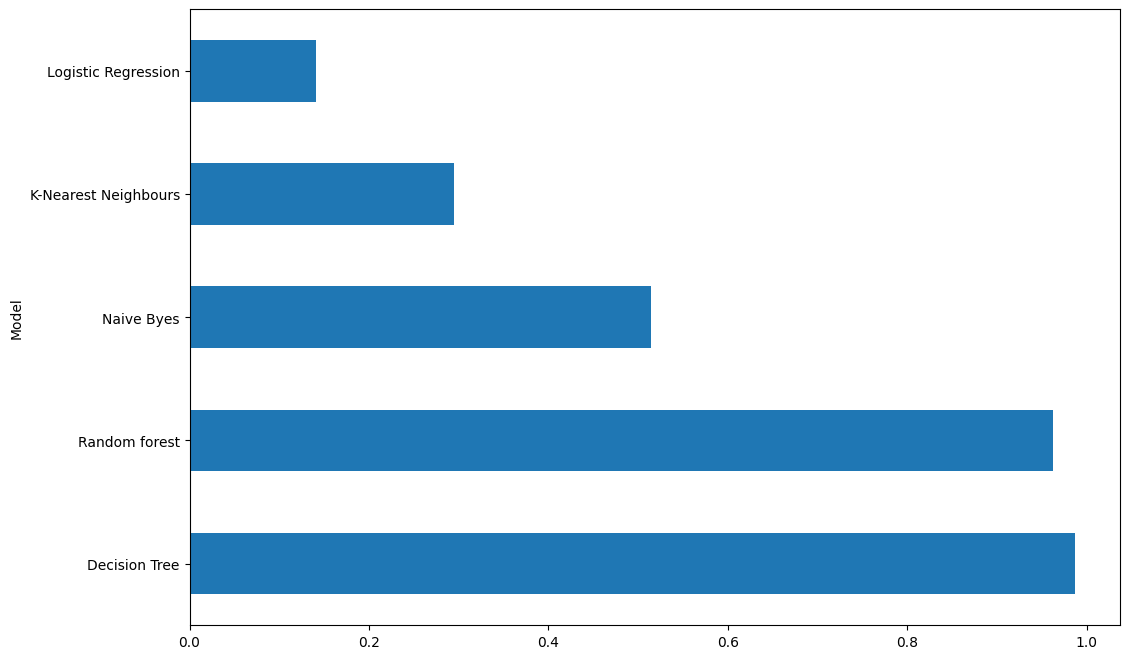

In [25]:
results.set_index('Model', inplace=True)
results['Accuracy'].plot(kind='barh', figsize=(12, 8))

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model, X, y):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [28]:
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df1 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred), cross_val(LinearRegression(), X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

results_df = results_df.append(results_df1, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 40.31299482323597
MSE: 6399.440461093907
RMSE: 79.99650280539711
R2 Square: 0.9998866997302559
__________________________________
Train set evaluation:
_____________________________________
MAE: 40.4213385274966
MSE: 5934.974190940419
RMSE: 77.03878368030234
R2 Square: 0.9998969565451178
__________________________________


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28724\1741764379.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df1, ignore_index=True)


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), cross_val(LinearRegression(), X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.250853954328478
MSE: 196.70022771603686
RMSE: 14.024985836571704
R2 Square: 0.999996517478521
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4452880000000011
MSE: 31.891635850193524
RMSE: 5.64726799879318
R2 Square: 0.9999994462950917
__________________________________


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28724\4178870669.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2, ignore_index=True)


In [33]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
model_lg.fit(X_train, y_train)
test_pred = model_lg.predict(X_test)
train_pred = model_lg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df3 = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, test_pred), cross_val(LinearRegression(), X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df3, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 535.0412849954845
MSE: 852291.3065410915
RMSE: 923.1962448694707
R2 Square: 0.9849104252912914
__________________________________
Train set evaluation:
_____________________________________
MAE: 534.9581290322581
MSE: 861104.7305806451
RMSE: 927.9572892006643
R2 Square: 0.9850494368467712
__________________________________


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28724\1659753808.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df3, ignore_index=True)


In [34]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC.fit(X_train, y_train)
test_pred = DTC.predict(X_test)
train_pred = DTC.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df4 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_test, test_pred), cross_val(DTC, X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df4, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.1094052380338022
MSE: 2732.3409882595793
RMSE: 52.2717991679986
R2 Square: 0.9999516246814257
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square: 1.0
__________________________________


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28724\318998936.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df4, ignore_index=True)


In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train,y_test)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)


lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df5 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), cross_val(DTC, X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df5, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.0904197283067532e-11
MSE: 3.011243713831587e-22
RMSE: 1.7352935526393183e-11
R2 Square: 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.097544466779988e-11
MSE: 3.101719768131462e-22
RMSE: 1.7611699997818105e-11
R2 Square: 1.0
__________________________________


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28724\2655393980.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df5, ignore_index=True)


In [36]:
from  sklearn.svm import  SVR
svr=SVR()
svr.fit(X_train, y_train)
test_pred = svr.predict(X_test)
train_pred = svr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df6 = pd.DataFrame(data=[['Support vector machine(Rergession)', *evaluate(y_test, test_pred), cross_val(DTC, X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df6, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3637.5416556173664
MSE: 48939444.89520569
RMSE: 6995.67329820409
R2 Square: 0.13354107418279537
__________________________________
Train set evaluation:
_____________________________________
MAE: 3719.9337434774566
MSE: 50091975.55659756
RMSE: 7077.568477704583
R2 Square: 0.1302994659849085
__________________________________


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28724\3344234035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df6, ignore_index=True)


In [37]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,4.031299e+01,6.399440e+03,7.999650e+01,0.999887,0.999897
1,Random Forest Regressor,1.250854e+00,1.967002e+02,1.402499e+01,0.999997,0.999897
2,Logistic Regression,5.350413e+02,8.522913e+05,9.231962e+02,0.984910,0.999897
3,Decision Tree Regressor,1.109405e+00,2.732341e+03,5.227180e+01,0.999952,0.987226
4,Polynomail Regression,1.090420e-11,3.011244e-22,1.735294e-11,1.000000,0.987226
5,Support vector machine(Rergession),3.637542e+03,4.893944e+07,6.995673e+03,0.133541,0.987226


<Axes: ylabel='Model'>

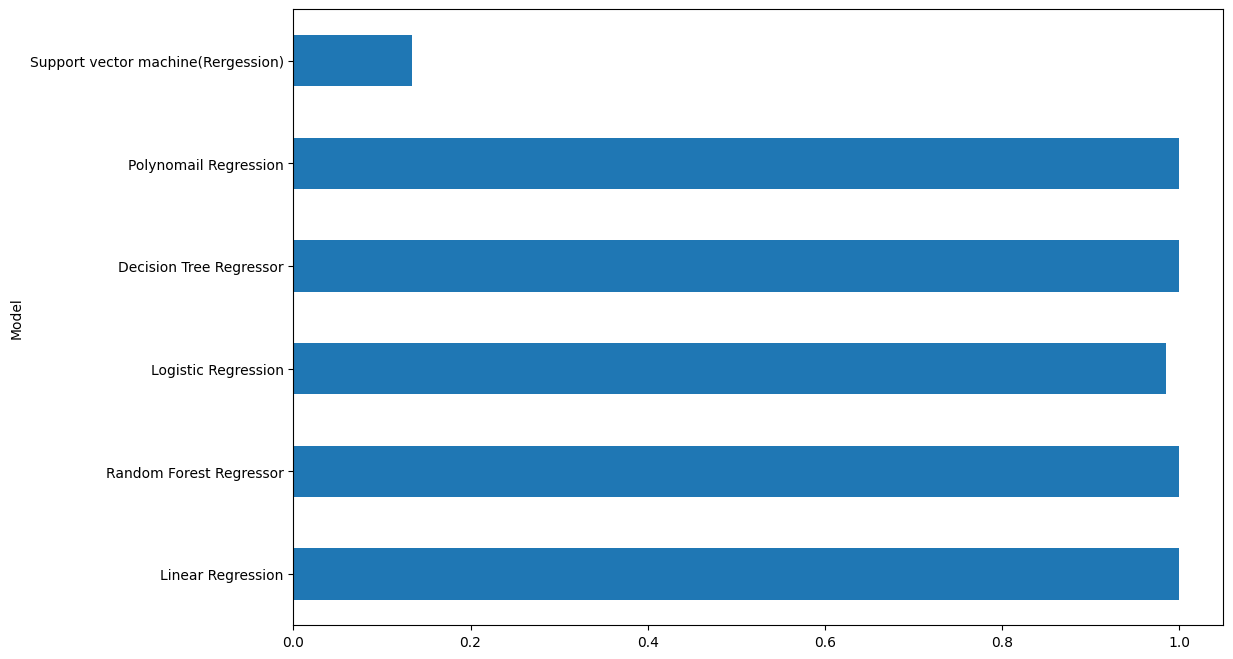

In [38]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))